In [1]:
import pandas as pd
import numpy as np

ruta='/content/drive/MyDrive/Colab Notebooks/ITESO/Ingeniería de características/P2022_MCD3735A/Módulo 4 - Codificación de variables categóricas/'
df=pd.read_csv(ruta+'Países.csv')

In [ ]:
df.head()

,Países
0,MEX
1,CHN
2,CAN
3,POL
4,CPV


In [2]:
N=df.shape[0] # Número de observaciones
n=len(df['Países'].unique()) # Número de categorías
n,N

(91, 560)

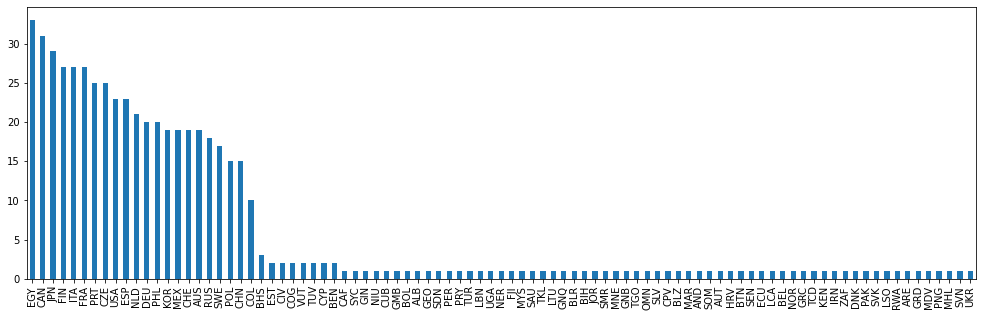

In [ ]:
vc=df['Países'].value_counts()
vc.plot.bar(figsize=(17,5))

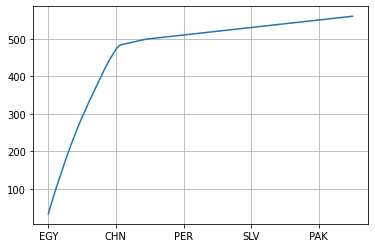

In [ ]:
vc.cumsum().plot(grid=True)

In [ ]:
N*0.8 # 80% de las observaciones

448.0

In [ ]:
np.ceil(n*0.2) # 20% de las categorías (índice 18)

19.0

In [ ]:
vc.cumsum().iloc[18]

442

In [ ]:
np.where(vc.cumsum()>N*0.8)[0][0] # índice de la categoría

19

In [ ]:
vc.cumsum().iloc[19]

457

In [3]:
# Se toman 20 categorías
m=20

In [ ]:
df['Países'].unique()

array(['MEX', 'CHN', 'CAN', 'POL', 'CPV', 'PHL', 'EGY', 'FIN', 'ITA',
       'AUS', 'CZE', 'BLZ', 'FRA', 'RUS', 'MAR', 'ESP', 'CIV', 'AND',
       'SOM', 'CHE', 'AUT', 'BHS', 'JPN', 'PRT', 'KOR', 'COL', 'USA',
       'NLD', 'HRV', 'SWE', 'DEU', 'BEN', 'BTN', 'SEN', 'ECU', 'LCA',
       'BEL', 'NOR', 'GRC', 'TCD', 'KEN', 'IRN', 'CYP', 'ZAF', 'DNK',
       'TGO', 'PAK', 'SVK', 'LSO', 'RWA', 'ARE', 'GRD', 'MDV', 'PNG',
       'MHL', 'SVN', 'SLV', 'OMN', 'TUV', 'GNB', 'PER', 'SDN', 'GEO',
       'ALB', 'BOL', 'GMB', 'CUB', 'GIN', 'VUT', 'COG', 'SYC', 'CAF',
       'PRY', 'LBN', 'UGA', 'NER', 'TUR', 'MYS', 'SAU', 'TKL', 'EST',
       'LTU', 'GNQ', 'BLR', 'FJI', 'NIU', 'MNE', 'SMR', 'JOR', 'BIH',
       'UKR'], dtype=object)

In [ ]:
keys={p:i for p,i in zip(df['Países'].unique(),range(n))}
keys
keyt=keys.copy()
for p in keys:
  keyt[p]=keys[p]%m # Codificación truncada a 'm' valores
keyt

In [5]:
out=[0]*m
for p in df['Países']:
  idx=keyt[p]
  out[idx]+=1
out # Valores de la codificación en frecuencia

[24, 21, 64, 43, 23, 33, 59, 51, 32, 40, 48, 5, 30, 21, 4, 26, 5, 4, 5, 22]

In [ ]:
pfh={}
for p,i in keyt.items():
  pfh[p]=out[i]
pfh

Clase `FeatureHaser`

In [7]:
from sklearn.feature_extraction import FeatureHasher

In [9]:
cod=FeatureHasher(n_features=m)
T=cod.transform([keys]).toarray()
T

array([[ -79.,   60.,  148.,    5.,   -7., -222.,  178.,  -74.,   40.,
        -103.,  -18.,  -63.,   85., -112.,  262.,   50.,  -50., -174.,
          -5.,  274.]])

In [ ]:
# Asociamos los índices de 'keyt' con los valores de 'T'
pmm3={}
for p,i in keyt.items():
  pmm3[p]=T[0][i]
pmm3

Clase `HashingEncoder`

In [14]:
!pip install category-encoders

     |████████████████████████████████| 82 kB 348 kB/s 


In [15]:
from category_encoders import HashingEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
encod=HashingEncoder(cols=['Países'],n_components=m)
encod.fit_transform(df)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
556,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
557,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
558,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
